In [ ]:
#importing libraries
from __future__ import absolute_import, division, print_function,unicode_literals
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import pandas as pd
import plotly.express as px
import requests
import datetime

from datetime import datetime
from datetime import datetime
mpl.rcParams['figure.figsize']=(10,8)
mpl.rcParams['axes.grid']=False

In [ ]:
#converting data time
def parse(x):
	return datetime.strptime(x, '%m/%d/%Y')

In [ ]:
#loading data set
df=pd.read_csv("Stock_Price_prediction.csv", parse_dates = ['Date'],date_parser=parse)

# TIME SERIES DATA ANALYSIS AND EXPLORATORY ANALYSIS

In [ ]:
#Reading data
df

,Date,Open,High,Low,Close,Volume
0,2012-01-03,325.250000,332.830000,324.970000,663.59,"7,380,500"
1,2012-01-04,331.270000,333.870000,329.080000,666.45,"5,749,400"
2,2012-01-05,329.830000,330.750000,326.890000,657.21,"6,590,300"
3,2012-01-06,328.340000,328.770000,323.680000,648.24,"5,405,900"
4,2012-01-09,322.040000,322.290000,309.460000,620.76,"11,688,800"
...,...,...,...,...,...,...
1526,2020-08-03,1486.640015,1490.469971,1465.640015,1474.449951,2330200
1527,2020-08-04,1476.569946,1485.560059,1458.650024,1464.969971,1903500
1528,2020-08-05,1469.300049,1482.410034,1463.459961,1473.609985,1979500
1529,2020-08-06,1471.750000,1502.390015,1466.000000,1500.099976,1995400


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1531 entries, 0 to 1530
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1531 non-null   datetime64[ns]
 1   Open    1531 non-null   float64       
 2   High    1531 non-null   float64       
 3   Low     1531 non-null   float64       
 4   Close   1531 non-null   object        
 5   Volume  1531 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 71.9+ KB


In [ ]:
print("Rows   :",df.shape[0])
print("Columns   :",df.shape[1])
print("\nFeatures   : \n",df.columns.tolist())
print("\nMissing value   :",df.isnull().any())
print("\nUnique values   :",df.nunique())

Rows   : 1531
Columns   : 6

Features   : 
 ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']

Missing value   : Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

Unique values   : Date      1531
Open      1484
High      1490
Low       1495
Close     1511
Volume    1510
dtype: int64


In [ ]:
df.describe()

,Open,High,Low
count,1531.000000,1531.000000,1531.000000
mean,668.536592,674.580450,662.374197
std,329.699438,333.789305,326.304181
min,279.120000,281.210000,277.220000
25%,437.650000,440.695000,435.305000
50%,566.850000,571.310000,560.680000
75%,758.585000,767.865000,752.435000
max,1586.989990,1586.989990,1554.280029


In [ ]:
#Setting index for date
si_df=df.set_index('Date')
si_df

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.250000,332.830000,324.970000,663.59,"7,380,500"
2012-01-04,331.270000,333.870000,329.080000,666.45,"5,749,400"
2012-01-05,329.830000,330.750000,326.890000,657.21,"6,590,300"
2012-01-06,328.340000,328.770000,323.680000,648.24,"5,405,900"
2012-01-09,322.040000,322.290000,309.460000,620.76,"11,688,800"
...,...,...,...,...,...
2020-08-03,1486.640015,1490.469971,1465.640015,1474.449951,2330200
2020-08-04,1476.569946,1485.560059,1458.650024,1464.969971,1903500
2020-08-05,1469.300049,1482.410034,1463.459961,1473.609985,1979500


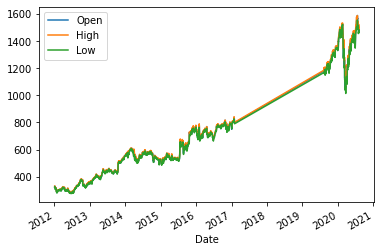

In [ ]:
si_df.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7eff6dd20390>,
      dtype=object)

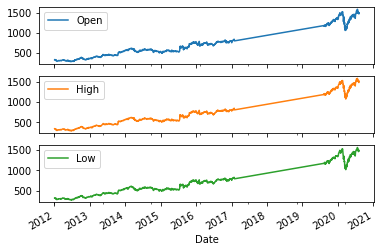

In [ ]:

si_df.plot(subplots=True)

In [ ]:
df['Close'] = df['Close'].apply(pd.to_numeric, downcast='float', errors='coerce')
df['Volume'] = df['Volume'].apply(pd.to_numeric, downcast='float', errors='coerce')

In [ ]:
df

,Date,Open,High,Low,Close,Volume
0,2012-01-03,325.250000,332.830000,324.970000,663.590027,NaN
1,2012-01-04,331.270000,333.870000,329.080000,666.450012,NaN
2,2012-01-05,329.830000,330.750000,326.890000,657.210022,NaN
3,2012-01-06,328.340000,328.770000,323.680000,648.239990,NaN
4,2012-01-09,322.040000,322.290000,309.460000,620.760010,NaN
...,...,...,...,...,...,...
1526,2020-08-03,1486.640015,1490.469971,1465.640015,1474.449951,2330200.0
1527,2020-08-04,1476.569946,1485.560059,1458.650024,1464.969971,1903500.0
1528,2020-08-05,1469.300049,1482.410034,1463.459961,1473.609985,1979500.0
1529,2020-08-06,1471.750000,1502.390015,1466.000000,1500.099976,1995400.0


In [ ]:
df.describe()

,Open,High,Low,Close,Volume
count,1531.000000,1531.000000,1531.000000,1422.000000,2.520000e+02
mean,668.536592,674.580450,662.374197,793.234469,1.708384e+06
std,329.699438,333.789305,326.304181,275.191660,7.665229e+05
min,279.120000,281.210000,277.220000,491.200012,3.475000e+05
25%,437.650000,440.695000,435.305000,584.395004,1.218225e+06
50%,566.850000,571.310000,560.680000,718.790009,1.515100e+06
75%,758.585000,767.865000,752.435000,858.897507,1.905950e+06
max,1586.989990,1586.989990,1554.280029,1568.489990,4.267700e+06


In [ ]:
#settting index for date
sii_df=df.set_index('Date')
sii_df

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.250000,332.830000,324.970000,663.590027,NaN
2012-01-04,331.270000,333.870000,329.080000,666.450012,NaN
2012-01-05,329.830000,330.750000,326.890000,657.210022,NaN
2012-01-06,328.340000,328.770000,323.680000,648.239990,NaN
2012-01-09,322.040000,322.290000,309.460000,620.760010,NaN
...,...,...,...,...,...
2020-08-03,1486.640015,1490.469971,1465.640015,1474.449951,2330200.0
2020-08-04,1476.569946,1485.560059,1458.650024,1464.969971,1903500.0
2020-08-05,1469.300049,1482.410034,1463.459961,1473.609985,1979500.0


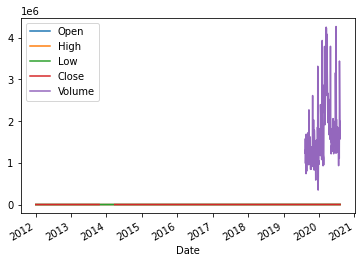

In [ ]:
sii_df.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7eff6d637ed0>,
      dtype=object)

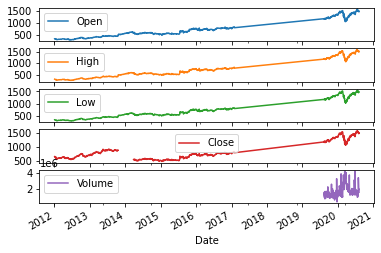

In [ ]:
sii_df.plot(subplots=True)

In [ ]:
fig = px.line(df, x='Date', y='Close', title='Stock Close Price Slider')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [ ]:
#Taking Volume column to standardiz
X_Vol=df.iloc[:,[5]]

In [ ]:
X_Vol

,Volume
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1526,2330200.0
1527,1903500.0
1528,1979500.0
1529,1995400.0


In [ ]:
from sklearn import preprocessing
standardized_X = preprocessing.scale(X_Vol)

In [ ]:
#data frame after standardizing volume column
dff = pd.DataFrame(standardized_X)


In [ ]:
#taking all columns except volume
dfff=df[['Date','Open','High','Low','Close']]

In [ ]:
#merging standardized data and other data
dfg=pd.merge(dfff,dff, left_index=True, right_index=True, how='outer')

In [ ]:
dfg

,Date,Open,High,Low,Close,0
0,2012-01-03,325.250000,332.830000,324.970000,663.590027,NaN
1,2012-01-04,331.270000,333.870000,329.080000,666.450012,NaN
2,2012-01-05,329.830000,330.750000,326.890000,657.210022,NaN
3,2012-01-06,328.340000,328.770000,323.680000,648.239990,NaN
4,2012-01-09,322.040000,322.290000,309.460000,620.760010,NaN
...,...,...,...,...,...,...
1526,2020-08-03,1486.640015,1490.469971,1465.640015,1474.449951,0.812831
1527,2020-08-04,1476.569946,1485.560059,1458.650024,1464.969971,0.255054
1528,2020-08-05,1469.300049,1482.410034,1463.459961,1473.609985,0.354400
1529,2020-08-06,1471.750000,1502.390015,1466.000000,1500.099976,0.375184


In [ ]:
#setting index for date
dsi_df=dfg.set_index('Date')
dsi_df

,Open,High,Low,Close,0
Date,,,,,
2012-01-03,325.250000,332.830000,324.970000,663.590027,NaN
2012-01-04,331.270000,333.870000,329.080000,666.450012,NaN
2012-01-05,329.830000,330.750000,326.890000,657.210022,NaN
2012-01-06,328.340000,328.770000,323.680000,648.239990,NaN
2012-01-09,322.040000,322.290000,309.460000,620.760010,NaN
...,...,...,...,...,...
2020-08-03,1486.640015,1490.469971,1465.640015,1474.449951,0.812831
2020-08-04,1476.569946,1485.560059,1458.650024,1464.969971,0.255054
2020-08-05,1469.300049,1482.410034,1463.459961,1473.609985,0.354400


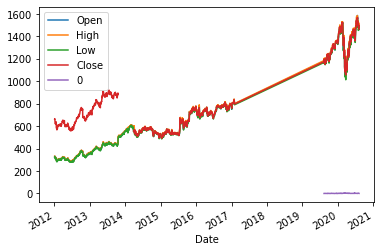

In [ ]:
dsi_df.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7eff6d3984d0>,
      dtype=object)

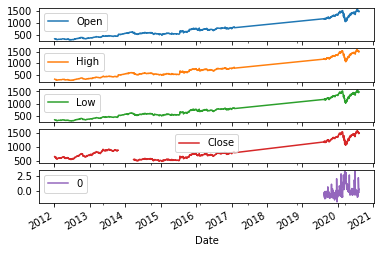

In [ ]:
dsi_df.plot(subplots=True)

In [ ]:
#caluclating mean for close and volume columns
#here 0 is volume
s=dfg[0].mean()
q=dfg['Close'].mean()

In [ ]:
#filling 'NaN' values with mean
dfg[0].fillna(value=s, limit=1531,inplace=True)
dfg['Close'].fillna(value=q, limit=1531,inplace=True)

In [ ]:
dfg

,Date,Open,High,Low,Close,0
0,2012-01-03,325.250000,332.830000,324.970000,663.590027,-5.198663e-17
1,2012-01-04,331.270000,333.870000,329.080000,666.450012,-5.198663e-17
2,2012-01-05,329.830000,330.750000,326.890000,657.210022,-5.198663e-17
3,2012-01-06,328.340000,328.770000,323.680000,648.239990,-5.198663e-17
4,2012-01-09,322.040000,322.290000,309.460000,620.760010,-5.198663e-17
...,...,...,...,...,...,...
1526,2020-08-03,1486.640015,1490.469971,1465.640015,1474.449951,8.128312e-01
1527,2020-08-04,1476.569946,1485.560059,1458.650024,1464.969971,2.550538e-01
1528,2020-08-05,1469.300049,1482.410034,1463.459961,1473.609985,3.544001e-01
1529,2020-08-06,1471.750000,1502.390015,1466.000000,1500.099976,3.751844e-01


In [ ]:
ew_df=dfg[[0]].rename({0:'Volume'}, axis='columns')

In [ ]:
ds=dfg[['Date','Open','High','Low','Close']]

In [ ]:
#merging standardized data and other data
dfgd=pd.merge(ds,ew_df, left_index=True, right_index=True, how='outer')

In [ ]:
dfgd

,Date,Open,High,Low,Close,Volume
0,2012-01-03,325.250000,332.830000,324.970000,663.590027,-5.198663e-17
1,2012-01-04,331.270000,333.870000,329.080000,666.450012,-5.198663e-17
2,2012-01-05,329.830000,330.750000,326.890000,657.210022,-5.198663e-17
3,2012-01-06,328.340000,328.770000,323.680000,648.239990,-5.198663e-17
4,2012-01-09,322.040000,322.290000,309.460000,620.760010,-5.198663e-17
...,...,...,...,...,...,...
1526,2020-08-03,1486.640015,1490.469971,1465.640015,1474.449951,8.128312e-01
1527,2020-08-04,1476.569946,1485.560059,1458.650024,1464.969971,2.550538e-01
1528,2020-08-05,1469.300049,1482.410034,1463.459961,1473.609985,3.544001e-01
1529,2020-08-06,1471.750000,1502.390015,1466.000000,1500.099976,3.751844e-01


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7eff6bfc3250>,
      dtype=object)

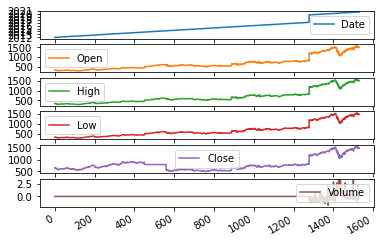

In [ ]:
dfgd.plot(subplots=True)

In [ ]:
new_df=dfgd.set_index('Date')
new_df

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.250000,332.830000,324.970000,663.590027,-5.198663e-17
2012-01-04,331.270000,333.870000,329.080000,666.450012,-5.198663e-17
2012-01-05,329.830000,330.750000,326.890000,657.210022,-5.198663e-17
2012-01-06,328.340000,328.770000,323.680000,648.239990,-5.198663e-17
2012-01-09,322.040000,322.290000,309.460000,620.760010,-5.198663e-17
...,...,...,...,...,...
2020-08-03,1486.640015,1490.469971,1465.640015,1474.449951,8.128312e-01
2020-08-04,1476.569946,1485.560059,1458.650024,1464.969971,2.550538e-01
2020-08-05,1469.300049,1482.410034,1463.459961,1473.609985,3.544001e-01


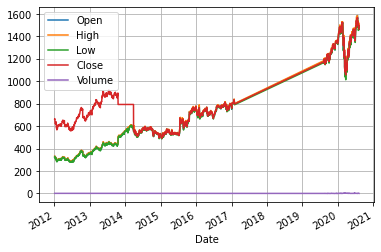

In [ ]:
new_df.plot(grid=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7eff5c56e610>,
      dtype=object)

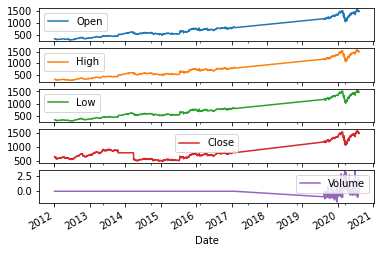

In [ ]:
new_df.plot(subplots=True)

In [ ]:
fig = px.line(dfgd, x='Date', y='Close', title='Stock Close Price Slider')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

Text(0.5, 1.0, 'Low')

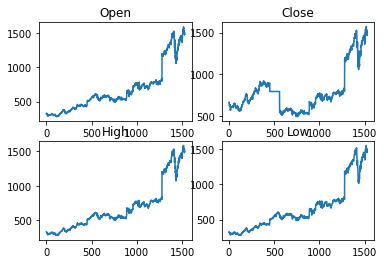

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
dfgd['Open'].plot(ax=axes[0,0]); axes[0,0].set_title('Open')
dfgd['Close'].plot(ax=axes[0,1]); axes[0,1].set_title('Close')
dfgd['High'].plot(ax=axes[1,0]); axes[1,0].set_title('High')
dfgd['Low'].plot(ax=axes[1,1]); axes[1,1].set_title('Low')


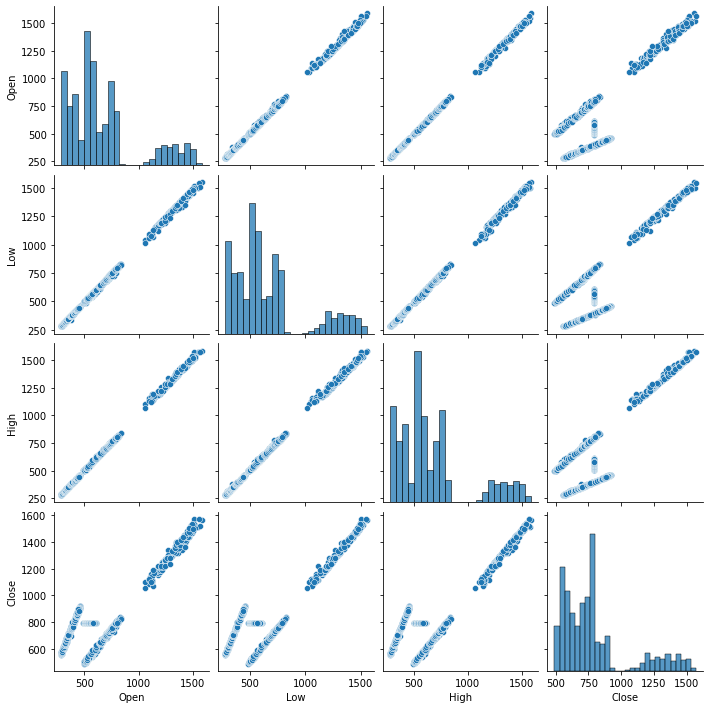

In [ ]:
import seaborn as sns
g=sns.pairplot(dfgd[['Open','Low','High','Close']])

In [ ]:
aq_corr=dfgd[['Open','Low','High','Close','Volume']].corr(method='pearson')
aq_corr

,Open,Low,High,Close,Volume
Open,1.000000,0.999749,0.999804,0.858542,-0.027506
Low,0.999749,1.000000,0.999653,0.859168,-0.037627
High,0.999804,0.999653,1.000000,0.859259,-0.020332
Close,0.858542,0.859168,0.859259,1.000000,-0.036309
Volume,-0.027506,-0.037627,-0.020332,-0.036309,1.000000


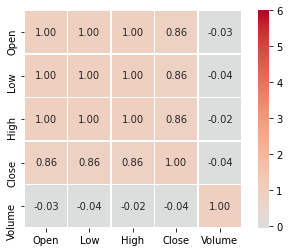

In [ ]:
g=sns.heatmap(aq_corr,vmax=6,center=0,
              square=True,linewidth=.5,annot=True,fmt='.2f',cmap='coolwarm')

# Simple moving average = (t + (t-1) + (t-2) + ... + (t-n)) / n

In [ ]:
new_df['Close'].rolling(window=3).mean()

Date
2012-01-03            NaN
2012-01-04            NaN
2012-01-05     662.416687
2012-01-06     657.300008
2012-01-09     642.070007
                 ...     
2020-08-03    1496.286621
2020-08-04    1474.126628
2020-08-05    1471.009969
2020-08-06    1479.559977
2020-08-07    1489.399984
Name: Close, Length: 1531, dtype: float64

In [ ]:
new_df['ma_rolling_3_C']=new_df['Close'].rolling(window=3).mean().shift(1)


In [ ]:
new_df['Low'].rolling(window=3).mean()

Date
2012-01-03            NaN
2012-01-04            NaN
2012-01-05     326.980000
2012-01-06     326.550000
2012-01-09     320.010000
                 ...     
2020-08-03    1470.630005
2020-08-04    1459.440023
2020-08-05    1462.583333
2020-08-06    1462.703328
2020-08-07    1470.366659
Name: Low, Length: 1531, dtype: float64

In [ ]:
new_df['ma_rolling_3_L']=new_df['Low'].rolling(window=3).mean().shift(1)

In [ ]:
new_df['High'].rolling(window=3).mean()

Date
2012-01-03            NaN
2012-01-04            NaN
2012-01-05     332.483333
2012-01-06     331.130000
2012-01-09     327.270000
                 ...     
2020-08-03    1512.429972
2020-08-04    1494.993327
2020-08-05    1486.146688
2020-08-06    1490.120036
2020-08-07    1500.548340
Name: High, Length: 1531, dtype: float64

In [ ]:
new_df['ma_rolling_3_H']=new_df['High'].rolling(window=3).mean().shift(1)

In [ ]:
new_df['Open'].rolling(window=3).mean()

Date
2012-01-03            NaN
2012-01-04            NaN
2012-01-05     328.783333
2012-01-06     329.813333
2012-01-09     326.736667
                 ...     
2020-08-03    1496.216675
2020-08-04    1489.406657
2020-08-05    1477.503337
2020-08-06    1472.539998
2020-08-07    1480.350016
Name: Open, Length: 1531, dtype: float64

In [ ]:
new_df['ma_rolling_3_O']=new_df['Open'].rolling(window=3).mean().shift(1)

In [ ]:
new_df

,Open,High,Low,Close,Volume,ma_rolling_3_C,ma_rolling_3_L,ma_rolling_3_H,ma_rolling_3_O
Date,,,,,,,,,
2012-01-03,325.250000,332.830000,324.970000,663.590027,-5.198663e-17,NaN,NaN,NaN,NaN
2012-01-04,331.270000,333.870000,329.080000,666.450012,-5.198663e-17,NaN,NaN,NaN,NaN
2012-01-05,329.830000,330.750000,326.890000,657.210022,-5.198663e-17,NaN,NaN,NaN,NaN
2012-01-06,328.340000,328.770000,323.680000,648.239990,-5.198663e-17,662.416687,326.980000,332.483333,328.783333
2012-01-09,322.040000,322.290000,309.460000,620.760010,-5.198663e-17,657.300008,326.550000,331.130000,329.813333
...,...,...,...,...,...,...,...,...,...
2020-08-03,1486.640015,1490.469971,1465.640015,1474.449951,8.128312e-01,1512.143311,1482.526652,1526.023966,1502.776652
2020-08-04,1476.569946,1485.560059,1458.650024,1464.969971,2.550538e-01,1496.286621,1470.630005,1512.429972,1496.216675
2020-08-05,1469.300049,1482.410034,1463.459961,1473.609985,3.544001e-01,1474.126628,1459.440023,1494.993327,1489.406657


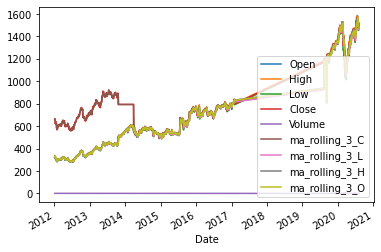

In [ ]:

new_df.plot();

# Weighted moving average = (t * weighting factor) + ((t-1) * weighting factor-1) + ((t-n) * weighting factor-n)/n¶

In [ ]:
def wma(weights): 
  def calc(x):
    return (weights*x).mean()
  return calc

In [ ]:
import numpy as np
new_df['Open'].rolling(window=3).apply(wma(np.array([0.5,1,1.5])))


Date
2012-01-03            NaN
2012-01-04            NaN
2012-01-05     329.546667
2012-01-06     329.325000
2012-01-09     325.438333
                 ...     
2020-08-03    1494.490011
2020-08-04    1484.666646
2020-08-05    1474.613342
2020-08-06    1471.736674
2020-08-07    1485.466675
Name: Open, Length: 1531, dtype: float64

In [ ]:
new_df['wma_rolling_3_O']=new_df['Open'].rolling(window=3).apply(wma(np.array([0.5,1,1.5]))).shift(1)

In [ ]:
new_df['Close'].rolling(window=3).apply(wma(np.array([0.5,1,1.5])))


Date
2012-01-03            NaN
2012-01-04            NaN
2012-01-05     661.353353
2012-01-06     654.265004
2012-01-09     635.995005
                 ...     
2020-08-03    1486.786621
2020-08-04    1471.128296
2020-08-05    1470.869975
2020-08-06    1485.414978
2020-08-07    1492.879985
Name: Close, Length: 1531, dtype: float64

In [ ]:
new_df['wma_rolling_3_C']=new_df['Close'].rolling(window=3).apply(wma(np.array([0.5,1,1.5]))).shift(1)

In [ ]:
new_df['High'].rolling(window=3).apply(wma(np.array([0.5,1,1.5])))


Date
2012-01-03            NaN
2012-01-04            NaN
2012-01-05     332.136667
2012-01-06     330.280000
2012-01-09     325.860000
                 ...     
2020-08-03    1504.529968
2020-08-04    1491.095012
2020-08-05    1484.803365
2020-08-06    1492.925029
2020-08-07    1506.287496
Name: High, Length: 1531, dtype: float64

In [ ]:
new_df['wma_rolling_3_H']=new_df['High'].rolling(window=3).apply(wma(np.array([0.5,1,1.5]))).shift(1)

In [ ]:
new_df['Low'].rolling(window=3).apply(wma(np.array([0.5,1,1.5])))


Date
2012-01-03            NaN
2012-01-04            NaN
2012-01-05     327.300000
2012-01-06     325.650000
2012-01-09     317.105000
                 ...     
2020-08-03    1466.200012
2020-08-04    1460.210022
2020-08-05    1462.219991
2020-08-06    1463.928324
2020-08-07    1473.396668
Name: Low, Length: 1531, dtype: float64

In [ ]:
new_df['wma_rolling_3_L']=new_df['Low'].rolling(window=3).apply(wma(np.array([0.5,1,1.5]))).shift(1)

In [ ]:
new_df

,Open,High,Low,Close,Volume,ma_rolling_3_C,ma_rolling_3_L,ma_rolling_3_H,ma_rolling_3_O,wma_rolling_3_O,wma_rolling_3_C,wma_rolling_3_H,wma_rolling_3_L
Date,,,,,,,,,,,,,
2012-01-03,325.250000,332.830000,324.970000,663.590027,-5.198663e-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,331.270000,333.870000,329.080000,666.450012,-5.198663e-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,329.830000,330.750000,326.890000,657.210022,-5.198663e-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06,328.340000,328.770000,323.680000,648.239990,-5.198663e-17,662.416687,326.980000,332.483333,328.783333,329.546667,661.353353,332.136667,327.300000
2012-01-09,322.040000,322.290000,309.460000,620.760010,-5.198663e-17,657.300008,326.550000,331.130000,329.813333,329.325000,654.265004,330.280000,325.650000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-03,1486.640015,1490.469971,1465.640015,1474.449951,8.128312e-01,1512.143311,1482.526652,1526.023966,1502.776652,1502.558329,1505.633301,1522.306966,1474.643331
2020-08-04,1476.569946,1485.560059,1458.650024,1464.969971,2.550538e-01,1496.286621,1470.630005,1512.429972,1496.216675,1494.490011,1486.786621,1504.529968,1466.200012
2020-08-05,1469.300049,1482.410034,1463.459961,1473.609985,3.544001e-01,1474.126628,1459.440023,1494.993327,1489.406657,1484.666646,1471.128296,1491.095012,1460.210022


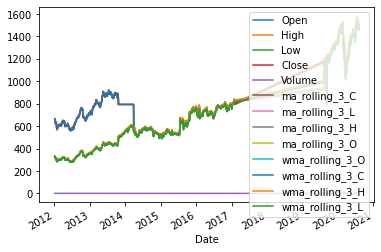

In [ ]:
new_df.plot()

# Exponential moving average = (Close - previous EMA) * (2/(span+1)) + previous EMA

In [ ]:
new_df['Open'].ewm(span=3, adjust=False, min_periods=0).mean()

Date
2012-01-03     325.250000
2012-01-04     328.260000
2012-01-05     329.045000
2012-01-06     328.692500
2012-01-09     325.366250
                 ...     
2020-08-03    1496.094105
2020-08-04    1486.332025
2020-08-05    1477.816037
2020-08-06    1474.783019
2020-08-07    1487.391509
Name: Open, Length: 1531, dtype: float64

In [ ]:
new_df['ewm_window_3_O']=new_df['Open'].ewm(span=3, adjust=False, min_periods=0).mean().shift(1)

In [ ]:
new_df['High'].ewm(span=3, adjust=False, min_periods=0).mean()

Date
2012-01-03     332.830000
2012-01-04     333.350000
2012-01-05     332.050000
2012-01-06     330.410000
2012-01-09     326.350000
                 ...     
2020-08-03    1506.314108
2020-08-04    1495.937084
2020-08-05    1489.173559
2020-08-06    1495.781787
2020-08-07    1506.313379
Name: High, Length: 1531, dtype: float64

In [ ]:
new_df['ewm_window_3_H']=new_df['High'].ewm(span=3, adjust=False, min_periods=0).mean().shift(1)

In [ ]:
new_df['Low'].ewm(span=3, adjust=False, min_periods=0).mean()

Date
2012-01-03     324.970000
2012-01-04     327.025000
2012-01-05     326.957500
2012-01-06     325.318750
2012-01-09     317.389375
                 ...     
2020-08-03    1470.682951
2020-08-04    1464.666488
2020-08-05    1464.063224
2020-08-06    1465.031612
2020-08-07    1473.335814
Name: Low, Length: 1531, dtype: float64

In [ ]:
new_df['ewm_window_3_L']=new_df['Low'].ewm(span=3, adjust=False, min_periods=0).mean().shift(1)

In [ ]:
new_df['Close'].ewm(span=3, adjust=False, min_periods=0).mean()

Date
2012-01-03     663.590027
2012-01-04     665.020020
2012-01-05     661.115021
2012-01-06     654.677505
2012-01-09     637.718758
                 ...     
2020-08-03    1489.139791
2020-08-04    1477.054881
2020-08-05    1475.332433
2020-08-06    1487.716204
2020-08-07    1491.103097
Name: Close, Length: 1531, dtype: float64

In [ ]:
new_df['ewm_window_3_C']=new_df['Close'].ewm(span=3, adjust=False, min_periods=0).mean().shift(1)

In [ ]:
new_df

,Open,High,Low,Close,Volume,ma_rolling_3_C,ma_rolling_3_L,ma_rolling_3_H,ma_rolling_3_O,wma_rolling_3_O,wma_rolling_3_C,wma_rolling_3_H,wma_rolling_3_L,ewm_window_3_O,ewm_window_3_H,ewm_window_3_L,ewm_window_3_C
Date,,,,,,,,,,,,,,,,,
2012-01-03,325.250000,332.830000,324.970000,663.590027,-5.198663e-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,331.270000,333.870000,329.080000,666.450012,-5.198663e-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,325.250000,332.830000,324.970000,663.590027
2012-01-05,329.830000,330.750000,326.890000,657.210022,-5.198663e-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,328.260000,333.350000,327.025000,665.020020
2012-01-06,328.340000,328.770000,323.680000,648.239990,-5.198663e-17,662.416687,326.980000,332.483333,328.783333,329.546667,661.353353,332.136667,327.300000,329.045000,332.050000,326.957500,661.115021
2012-01-09,322.040000,322.290000,309.460000,620.760010,-5.198663e-17,657.300008,326.550000,331.130000,329.813333,329.325000,654.265004,330.280000,325.650000,328.692500,330.410000,325.318750,654.677505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-03,1486.640015,1490.469971,1465.640015,1474.449951,8.128312e-01,1512.143311,1482.526652,1526.023966,1502.776652,1502.558329,1505.633301,1522.306966,1474.643331,1505.548195,1522.158245,1475.725887,1503.829630
2020-08-04,1476.569946,1485.560059,1458.650024,1464.969971,2.550538e-01,1496.286621,1470.630005,1512.429972,1496.216675,1494.490011,1486.786621,1504.529968,1466.200012,1496.094105,1506.314108,1470.682951,1489.139791
2020-08-05,1469.300049,1482.410034,1463.459961,1473.609985,3.544001e-01,1474.126628,1459.440023,1494.993327,1489.406657,1484.666646,1471.128296,1491.095012,1460.210022,1486.332025,1495.937084,1464.666488,1477.054881


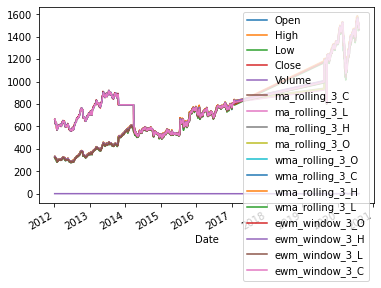

In [ ]:
new_df.plot()

# Exponential Smoothing

In [ ]:
new_df['Open'].ewm(alpha=0.7, adjust=False, min_periods=3).mean()

Date
2012-01-03            NaN
2012-01-04            NaN
2012-01-05     329.720200
2012-01-06     328.754060
2012-01-09     324.054218
                 ...     
2020-08-03    1491.813642
2020-08-04    1481.143055
2020-08-05    1472.852951
2020-08-06    1472.080885
2020-08-07    1491.624266
Name: Open, Length: 1531, dtype: float64

In [ ]:
new_df['esm_window_3_7_O']=new_df['Open'].ewm(alpha=0.7, adjust=False,min_periods=3).mean().shift(1)

In [ ]:
new_df['High'].ewm(alpha=0.7, adjust=False, min_periods=3).mean()

Date
2012-01-03            NaN
2012-01-04            NaN
2012-01-05     331.592400
2012-01-06     329.616720
2012-01-09     324.488016
                 ...     
2020-08-03    1498.429520
2020-08-04    1489.420897
2020-08-05    1484.513293
2020-08-06    1497.026998
2020-08-07    1510.899579
Name: High, Length: 1531, dtype: float64

In [ ]:
new_df['esm_window_3_7_H']=new_df['High'].ewm(alpha=0.7, adjust=False,min_periods=3).mean().shift(1)
new_df['Low'].ewm(alpha=0.7, adjust=False, min_periods=3).mean()

Date
2012-01-03            NaN
2012-01-04            NaN
2012-01-05     327.177100
2012-01-06     324.729130
2012-01-09     314.040739
                 ...     
2020-08-03    1465.840000
2020-08-04    1460.807017
2020-08-05    1462.664078
2020-08-06    1464.999223
2020-08-07    1476.647777
Name: Low, Length: 1531, dtype: float64

In [ ]:
new_df['esm_window_3_7_L']=new_df['Low'].ewm(alpha=0.7, adjust=False,min_periods=3).mean().shift(1)

In [ ]:
new_df['Close'].ewm(alpha=0.7, adjust=False, min_periods=3).mean()

Date
2012-01-03            NaN
2012-01-04            NaN
2012-01-05     659.724620
2012-01-06     651.685379
2012-01-09     630.037621
                 ...     
2020-08-03    1481.000089
2020-08-04    1469.779006
2020-08-05    1472.460692
2020-08-06    1491.808190
2020-08-07    1493.685450
Name: Close, Length: 1531, dtype: float64

In [ ]:
new_df['esm_window_3_7_C']=new_df['Close'].ewm(alpha=0.7, adjust=False,min_periods=3).mean().shift(1)

In [ ]:
new_df

,Open,High,Low,Close,Volume,ma_rolling_3_C,ma_rolling_3_L,ma_rolling_3_H,ma_rolling_3_O,wma_rolling_3_O,wma_rolling_3_C,wma_rolling_3_H,wma_rolling_3_L,ewm_window_3_O,ewm_window_3_H,ewm_window_3_L,ewm_window_3_C,esm_window_3_7_O,esm_window_3_7_H,esm_window_3_7_L,esm_window_3_7_C
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,325.250000,332.830000,324.970000,663.590027,-5.198663e-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,331.270000,333.870000,329.080000,666.450012,-5.198663e-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,325.250000,332.830000,324.970000,663.590027,NaN,NaN,NaN,NaN
2012-01-05,329.830000,330.750000,326.890000,657.210022,-5.198663e-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,328.260000,333.350000,327.025000,665.020020,NaN,NaN,NaN,NaN
2012-01-06,328.340000,328.770000,323.680000,648.239990,-5.198663e-17,662.416687,326.980000,332.483333,328.783333,329.546667,661.353353,332.136667,327.300000,329.045000,332.050000,326.957500,661.115021,329.720200,331.592400,327.177100,659.724620
2012-01-09,322.040000,322.290000,309.460000,620.760010,-5.198663e-17,657.300008,326.550000,331.130000,329.813333,329.325000,654.265004,330.280000,325.650000,328.692500,330.410000,325.318750,654.677505,328.754060,329.616720,324.729130,651.685379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-03,1486.640015,1490.469971,1465.640015,1474.449951,8.128312e-01,1512.143311,1482.526652,1526.023966,1502.776652,1502.558329,1505.633301,1522.306966,1474.643331,1505.548195,1522.158245,1475.725887,1503.829630,1503.885439,1517.001802,1466.306631,1496.283744
2020-08-04,1476.569946,1485.560059,1458.650024,1464.969971,2.550538e-01,1496.286621,1470.630005,1512.429972,1496.216675,1494.490011,1486.786621,1504.529968,1466.200012,1496.094105,1506.314108,1470.682951,1489.139791,1491.813642,1498.429520,1465.840000,1481.000089
2020-08-05,1469.300049,1482.410034,1463.459961,1473.609985,3.544001e-01,1474.126628,1459.440023,1494.993327,1489.406657,1484.666646,1471.128296,1491.095012,1460.210022,1486.332025,1495.937084,1464.666488,1477.054881,1481.143055,1489.420897,1460.807017,1469.779006


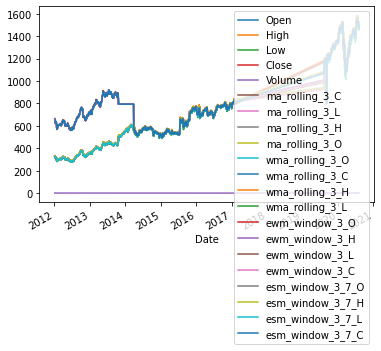

In [ ]:
new_df.plot()

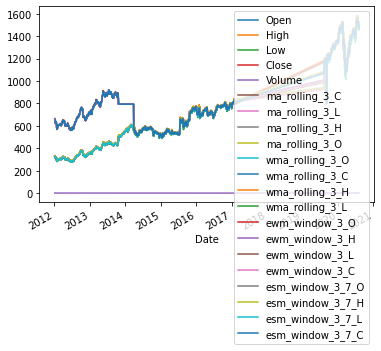

In [ ]:
new_df.plot()

# RMSE

In [ ]:
((new_df['Open']-new_df['ma_rolling_3_O'])**2).mean()**0.5

19.43058021334757

In [ ]:
((new_df['Low']-new_df['ma_rolling_3_L'])**2).mean()**0.5

19.011105971761584

In [ ]:
((new_df['High']-new_df['ma_rolling_3_H'])**2).mean()**0.5

18.684270297904654

In [ ]:
((new_df['Close']-new_df['ma_rolling_3_C'])**2).mean()**0.5

21.519766759086036

In [ ]:
((new_df['Open']-new_df['wma_rolling_3_O'])**2).mean()**0.5

17.866565977775554

In [ ]:
((new_df['Close']-new_df['wma_rolling_3_C'])**2).mean()**0.5

19.750062583184377

In [ ]:
((new_df['Low']-new_df['wma_rolling_3_L'])**2).mean()**0.5

17.230287749407985

In [ ]:
((new_df['High']-new_df['wma_rolling_3_H'])**2).mean()**0.5

17.002935514944657

In [ ]:
((new_df['High']-new_df['ewm_window_3_H'])**2).mean()**0.5

17.253197686971134

In [ ]:
((new_df['Low']-new_df['ewm_window_3_L'])**2).mean()**0.5

17.550938122388825

In [ ]:

((new_df['Open']-new_df['ewm_window_3_O'])**2).mean()**0.5

18.132944885232416

In [ ]:
((new_df['Close']-new_df['ewm_window_3_C'])**2).mean()**0.5

20.075765004675123

In [ ]:
((new_df['Open']-new_df['esm_window_3_7_O'])**2).mean()**0.5

16.883540349184212

In [ ]:
((new_df['Close']-new_df['esm_window_3_7_C'])**2).mean()**0.5

18.664090366509907

In [ ]:
((new_df['Low']-new_df['esm_window_3_7_L'])**2).mean()**0.5

15.948696608260649

In [ ]:
((new_df['High']-new_df['esm_window_3_7_H'])**2).mean()**0.5

15.816535888621939

In [ ]:
nnew_df=new_df.reset_index('Date')

In [ ]:
nnew_df

,Date,Open,High,Low,Close,Volume,ma_rolling_3_C,ma_rolling_3_L,ma_rolling_3_H,ma_rolling_3_O,wma_rolling_3_O,wma_rolling_3_C,wma_rolling_3_H,wma_rolling_3_L,ewm_window_3_O,ewm_window_3_H,ewm_window_3_L,ewm_window_3_C,esm_window_3_7_O,esm_window_3_7_H,esm_window_3_7_L,esm_window_3_7_C
0,2012-01-03,325.250000,332.830000,324.970000,663.590027,-5.198663e-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-01-04,331.270000,333.870000,329.080000,666.450012,-5.198663e-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,325.250000,332.830000,324.970000,663.590027,NaN,NaN,NaN,NaN
2,2012-01-05,329.830000,330.750000,326.890000,657.210022,-5.198663e-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,328.260000,333.350000,327.025000,665.020020,NaN,NaN,NaN,NaN
3,2012-01-06,328.340000,328.770000,323.680000,648.239990,-5.198663e-17,662.416687,326.980000,332.483333,328.783333,329.546667,661.353353,332.136667,327.300000,329.045000,332.050000,326.957500,661.115021,329.720200,331.592400,327.177100,659.724620
4,2012-01-09,322.040000,322.290000,309.460000,620.760010,-5.198663e-17,657.300008,326.550000,331.130000,329.813333,329.325000,654.265004,330.280000,325.650000,328.692500,330.410000,325.318750,654.677505,328.754060,329.616720,324.729130,651.685379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526,2020-08-03,1486.640015,1490.469971,1465.640015,1474.449951,8.128312e-01,1512.143311,1482.526652,1526.023966,1502.776652,1502.558329,1505.633301,1522.306966,1474.643331,1505.548195,1522.158245,1475.725887,1503.829630,1503.885439,1517.001802,1466.306631,1496.283744
1527,2020-08-04,1476.569946,1485.560059,1458.650024,1464.969971,2.550538e-01,1496.286621,1470.630005,1512.429972,1496.216675,1494.490011,1486.786621,1504.529968,1466.200012,1496.094105,1506.314108,1470.682951,1489.139791,1491.813642,1498.429520,1465.840000,1481.000089
1528,2020-08-05,1469.300049,1482.410034,1463.459961,1473.609985,3.544001e-01,1474.126628,1459.440023,1494.993327,1489.406657,1484.666646,1471.128296,1491.095012,1460.210022,1486.332025,1495.937084,1464.666488,1477.054881,1481.143055,1489.420897,1460.807017,1469.779006
1529,2020-08-06,1471.750000,1502.390015,1466.000000,1500.099976,3.751844e-01,1471.009969,1462.583333,1486.146688,1477.503337,1474.613342,1470.869975,1484.803365,1462.219991,1477.816037,1489.173559,1464.063224,1475.332433,1472.852951,1484.513293,1462.664078,1472.460692


# STATIONARY TEST

In [ ]:
#Null hypothesis - data is stationary

#Alternate hypothesis - data is not stationary

In [ ]:
from statsmodels.tsa.stattools import kpss

In [ ]:
stats, p, lags, critical_values = kpss(new_df['Close'], 'ct')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1875: FutureWarning:

The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1907: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




In [ ]:
print(f'Test Statistics: {stats}')
print(f'p-value: {p}')
print(f'Critial Values: {critical_values}')

if p < 0.05 :
  print('Series is not Stationary')
else:
  print('Series is Stationary')


Test Statistics: 1.0943527736691214
p-value: 0.01
Critial Values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
Series is not Stationary


In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(new_df['Open'])

In [ ]:
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Critial Values: {result[4]}')

if result[1] > 0.05 :
  print('Series is not Stationary')
else:
  print('Series is Stationary')

Test Statistics: 0.6176319102676208
p-value: 0.9880422578373651
Critial Values: {'1%': -3.434634049963598, '5%': -2.863432142744973, '10%': -2.5677773493449725}
Series is not Stationary


# ARIMA

In [ ]:
!pip install pmdarima

In [ ]:
!pip install --upgrade pip

     |████████████████████████████████| 1.5MB 4.2MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1


In [ ]:
import pmdarima as pm

model = pm.auto_arima(new_df['Close'], 
                        m=12, seasonal=True,
                      start_p=0, start_q=0, max_order=4, test='adf',error_action='ignore',  
                           suppress_warnings=True,
                      stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=13258.980, Time=1.65 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=13265.005, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=13237.135, Time=1.63 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=13237.865, Time=2.16 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=13264.331, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=13242.187, Time=0.08 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=13237.125, Time=3.41 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=13238.729, Time=8.50 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=13237.341, Time=3.32 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=13258.697, Time=2.67 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=13238.544, Time=4.78 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=13238.399, Time=5.85 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=13238.178, Time=4.80 sec
 ARIMA(2,1,1)(2,0,0)[12] intercept   : AIC=13236.922, Time=9.84 sec
 ARIM

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1531
Model:             SARIMAX(2, 1, 2)x(1, 0, [], 12)   Log Likelihood               -6597.981
Date:                             Tue, 09 Mar 2021   AIC                          13207.962
Time:                                     14:14:10   BIC                          13239.961
Sample:                                          0   HQIC                         13219.871
                                            - 1531                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7526      0.020    -89.820      0.000      -1.791      -1.714
ar.L2         -0.9158      0.021    -44.445      0.000      -0.956      -0.875
ma.L1          1.6783      0.027     61.723      0.000       1.625       1.732
ma.L2          0.8368      0.028     29.562      0.000       0.781       0.892
ar.S.L12       0.0533      0.022      2.410      0.016       0.010       0.097
sigma2       325.7482      1.351    241.097      0.000     323.100     328.396
===================================================================================
Ljung-Box (L1) (Q):                   0.97   Jarque-Bera (JB):           1746192.21
Prob(Q):                              0.32   Prob(JB):                         0.00
Heteroskedasticity (H):               7.14   Skew:                             4.85
Prob(H) (two-sided):                  0.00   Kurtosis:                       168.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train=nnew_df[(nnew_df['Date'] >= '2012-01-31' ) & (nnew_df['Date'] <= '2020-07-08')]
test=nnew_df[(nnew_df['Date'] > '2020-07-08')]

In [ ]:
test

,Date,Open,High,Low,Close,Volume,ma_rolling_3_C,ma_rolling_3_L,ma_rolling_3_H,ma_rolling_3_O,wma_rolling_3_O,wma_rolling_3_C,wma_rolling_3_H,wma_rolling_3_L,ewm_window_3_O,ewm_window_3_H,ewm_window_3_L,ewm_window_3_C,esm_window_3_7_O,esm_window_3_7_H,esm_window_3_7_L,esm_window_3_7_C
1509,2020-07-09,1506.449951,1522.719971,1488.084961,1510.989990,-0.372658,1492.293335,1480.680013,1509.756673,1488.126668,1490.503316,1492.343343,1509.638346,1482.808350,1482.758048,1502.599181,1475.267409,1486.671374,1490.887561,1507.208760,1482.949592,1492.572556
1510,2020-07-10,1506.150024,1543.829956,1496.540039,1541.739990,0.193354,1497.390015,1485.755005,1515.133342,1496.923299,1499.664957,1501.691671,1516.119995,1486.510824,1494.604000,1512.659576,1481.676185,1498.830682,1501.781234,1518.066608,1486.544350,1505.464760
1511,2020-07-13,1550.000000,1577.131958,1505.243042,1511.339966,0.180413,1516.243327,1490.085002,1524.143311,1502.306640,1504.278320,1523.866659,1530.468303,1491.903341,1500.377012,1528.244766,1489.108112,1520.285336,1504.839387,1536.100951,1493.541332,1530.857421
1512,2020-07-14,1490.310059,1522.949951,1483.500000,1520.579956,-0.161286,1521.356649,1496.622681,1547.893962,1520.866658,1528.125000,1521.414978,1556.962626,1499.482361,1525.188506,1552.688362,1497.175577,1515.812651,1536.451816,1564.822656,1501.732529,1517.195202
1513,2020-07-15,1523.130005,1535.329956,1498.000000,1513.640015,-0.127691,1524.553304,1495.094360,1547.970622,1515.486694,1512.846700,1521.026632,1544.490621,1492.921020,1507.749282,1537.819156,1490.337789,1518.196304,1504.152586,1535.511763,1488.969759,1519.564530
1514,2020-07-16,1500.000000,1518.689941,1486.310059,1518.000000,-0.247168,1515.186646,1495.581014,1545.137288,1521.146688,1516.668355,1515.569987,1538.170288,1494.373840,1515.439644,1536.574556,1494.168894,1515.918159,1517.436779,1535.384498,1495.290928,1515.417369
1515,2020-07-17,1521.619995,1523.439941,1498.420044,1515.550049,-0.328998,1517.406657,1489.270020,1525.656616,1504.480021,1506.095011,1516.976664,1524.946614,1489.738363,1507.719822,1527.632249,1490.239477,1516.959080,1505.231034,1523.698308,1489.004320,1517.225211
1516,2020-07-20,1515.260010,1570.290039,1503.599976,1565.719971,-0.197495,1515.730021,1494.243368,1525.819946,1514.916667,1514.664998,1516.048360,1523.838277,1494.313375,1514.669908,1525.536095,1494.329760,1516.254564,1516.703307,1523.517451,1495.595327,1516.052597
1517,2020-07-21,1586.989990,1586.989990,1554.280029,1558.420044,-0.640240,1533.090007,1496.110026,1537.473307,1512.293335,1514.836670,1541.043335,1546.073323,1498.991679,1514.964959,1547.913067,1498.964868,1540.987267,1515.692999,1556.258263,1501.198581,1550.819759
1518,2020-07-22,1560.500000,1570.000000,1546.099976,1568.489990,-1.014880,1546.563354,1518.766683,1560.239990,1541.289998,1552.184997,1553.708354,1570.831665,1528.076681,1550.977475,1567.451528,1526.622449,1549.703656,1565.600893,1577.770472,1538.355595,1556.139958


In [ ]:
test.shape

(22, 22)

In [ ]:
model.fit(train['Close'])

ARIMA(maxiter=50, method='lbfgs', order=(2, 1, 2), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(1, 0, 0, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [ ]:
forecast=model.predict(n_periods=4, return_conf_int=True)

In [ ]:
forecast

(array([1502.1825079 , 1498.35240227, 1499.79377684, 1499.06463501]),
 array([[1466.95397764, 1537.41103816],
        [1450.4304914 , 1546.27431315],
        [1440.83954089, 1558.74801278],
        [1431.20860224, 1566.92066778]]))

In [ ]:
forecast1=model.predict(n_periods=8, return_conf_int=True)

In [ ]:
forecast1

(array([1502.1825079 , 1498.35240227, 1499.79377684, 1499.06463501,
        1494.56015821, 1498.44299007, 1496.02354089, 1500.9229287 ]),
 array([[1466.95397764, 1537.41103816],
        [1450.4304914 , 1546.27431315],
        [1440.83954089, 1558.74801278],
        [1431.20860224, 1566.92066778],
        [1419.01515207, 1570.10516436],
        [1415.36448195, 1581.52149818],
        [1406.80010456, 1585.24697721],
        [1405.13465877, 1596.71119862]]))

In [ ]:
forecast_range=pd.date_range(start='2017-05-31', periods=8,freq='M')

In [ ]:
forecast1_df = pd.DataFrame(forecast1[0],index =forecast_range,columns=['Prediction'])

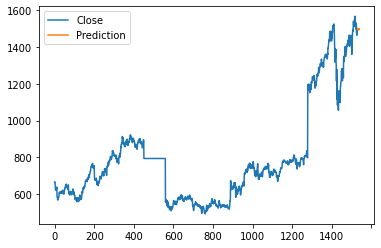

In [ ]:
pd.concat([nnew_df['Close'],forecast1_df],axis=1).plot()

In [ ]:
lower=pd.Series(forecast1[1][:, 0], index =forecast_range)
upper=pd.Series(forecast1[1][:, 1], index =forecast_range)

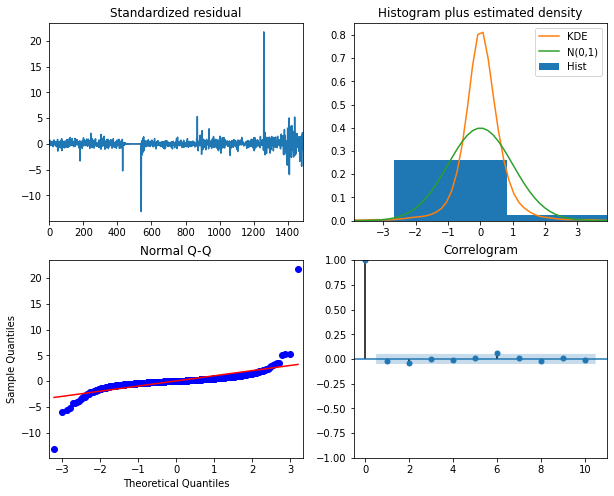

In [ ]:
mpl.rcParams['figure.figsize']=(10,8)
mpl.rcParams['axes.grid']=False
out=model.plot_diagnostics()

# FACEBOOK PROPHET


In [ ]:
from fbprophet import Prophet

In [ ]:
neew_df=new_df.reset_index()[['Date','Close']].rename({'Date':'ds','Close':'y'}, axis='columns')

In [ ]:
neew_df

,ds,y
0,2012-01-03,663.590027
1,2012-01-04,666.450012
2,2012-01-05,657.210022
3,2012-01-06,648.239990
4,2012-01-09,620.760010
...,...,...
1526,2020-08-03,1474.449951
1527,2020-08-04,1464.969971
1528,2020-08-05,1473.609985
1529,2020-08-06,1500.099976


In [ ]:
train=neew_df[(neew_df['ds'] >= '2012-01-31' ) & (neew_df['ds'] <= '2020-07-08')]
test=neew_df[(neew_df['ds'] > '2020-07-08')]

In [ ]:
train.shape

(1490, 2)

In [ ]:
test.shape

(22, 2)

In [ ]:
test

,ds,y
1509,2020-07-09,1510.989990
1510,2020-07-10,1541.739990
1511,2020-07-13,1511.339966
1512,2020-07-14,1520.579956
1513,2020-07-15,1513.640015
1514,2020-07-16,1518.000000
1515,2020-07-17,1515.550049
1516,2020-07-20,1565.719971
1517,2020-07-21,1558.420044
1518,2020-07-22,1568.489990


In [ ]:
m = Prophet(interval_width=0.95,yearly_seasonality=True)

In [ ]:
m.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
m.params

{'beta': array([[-5.89541890e-03,  1.56104391e-02,  1.00376851e-02,
          5.02464846e-03,  6.63709376e-03, -2.44461983e-03,
         -8.23807697e-04, -5.18483722e-03, -5.02370669e-03,
          1.52456042e-03,  7.87126007e-04, -1.11922582e-03,
          7.64618439e-05,  1.98674340e-03, -8.94088003e-04,
         -5.34059581e-04,  6.79597461e-05, -9.77597880e-04,
          4.09180382e-05,  3.87650804e-04, -7.02816616e-03,
          1.13045747e-02,  9.63562123e-03, -6.38823440e-03,
         -1.08439402e-02,  1.79912405e-03]]),
 'delta': array([[ 8.37913912e-08,  6.69708376e-06,  1.27404756e-06,
          5.29166614e-01,  6.73005388e-01, -3.87859021e-08,
         -1.61843136e+00, -1.88782579e+00, -5.54867347e-01,
         -2.69901260e-06, -6.63003901e-08,  7.44032693e-01,
          3.53078973e-01,  9.81812463e-04,  9.41699058e-01,
          1.18672812e+00,  2.91418903e-08, -5.65379700e-08,
         -3.32531488e-07, -4.34614506e-01, -1.08075929e-01,
         -2.27426322e-01,  5.46319449

In [ ]:
future = m.make_future_dataframe(periods=22)
future.tail()

,ds
1507,2020-07-26
1508,2020-07-27
1509,2020-07-28
1510,2020-07-29
1511,2020-07-30


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1507,2020-07-26,1338.352970,1249.336022,1430.085705
1508,2020-07-27,1404.407447,1312.299000,1494.093261
1509,2020-07-28,1406.271018,1310.886563,1497.876419
1510,2020-07-29,1408.647040,1308.516060,1497.108005
1511,2020-07-30,1408.341734,1312.080202,1500.577962


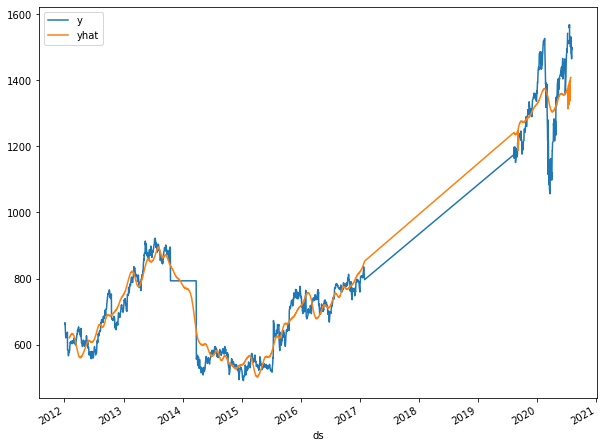

In [ ]:
pd.concat([neew_df.set_index('ds')['y'],forecast.set_index('ds')['yhat']],axis=1).plot()

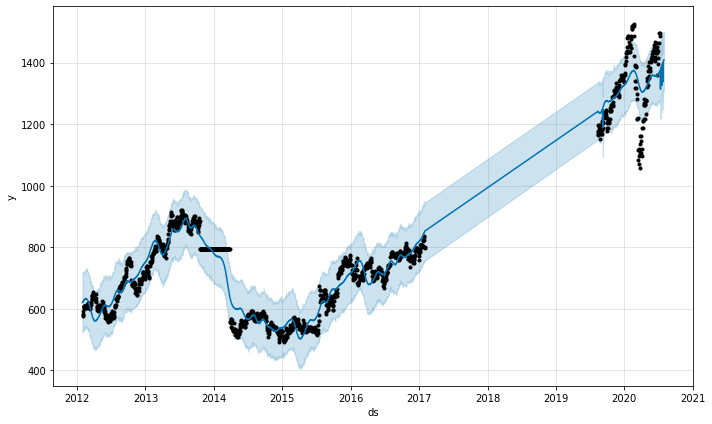

In [ ]:
fig1 = m.plot(forecast)

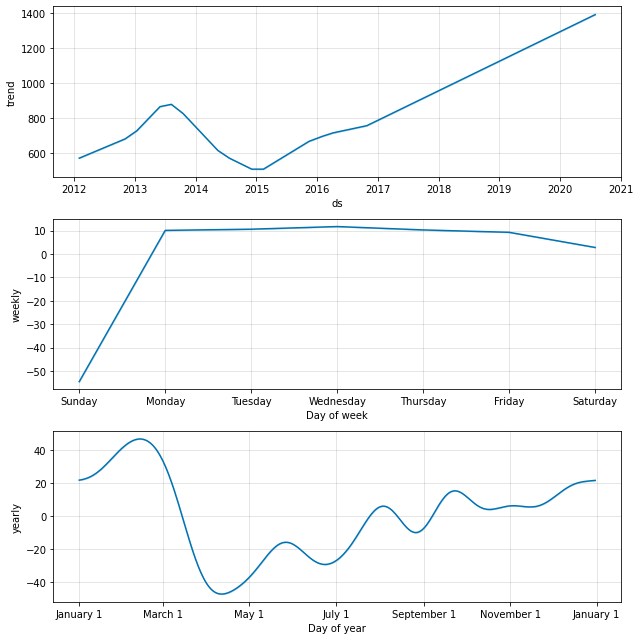

In [ ]:
fig2 = m.plot_components(forecast)

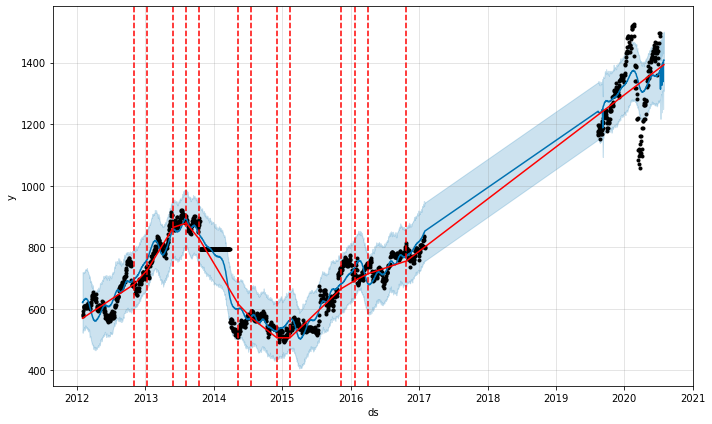

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


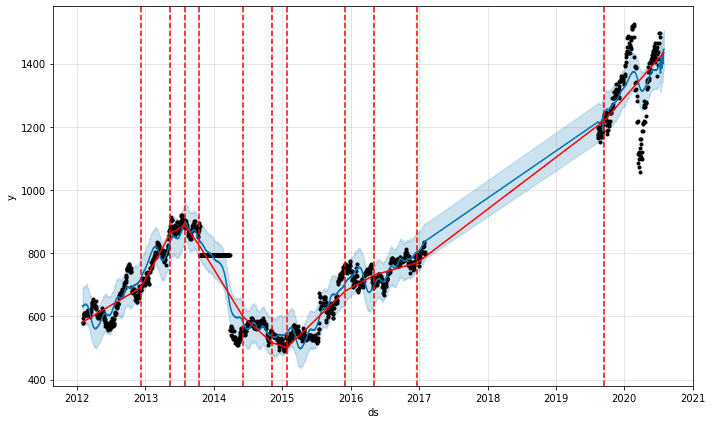

In [ ]:
pro_change= Prophet(changepoint_range = 0.9, yearly_seasonality=True)
forecast = pro_change.fit(train).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

In [ ]:
from fbprophet.plot import plot_plotly
import plotly.offline as py

fig = plot_plotly(m, forecast)  # This returns a plotly Figure
py.iplot(fig)

In [ ]:
from fbprophet.diagnostics import cross_validation
cv_results = cross_validation( model = m, initial = '731 days', horizon = '365 days')

INFO:fbprophet:Making 7 forecasts with cutoffs between 2014-02-01 00:00:00 and 2019-07-09 00:00:00


In [ ]:
cv_results.head()


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2014-02-03,811.985126,784.922068,838.316701,793.234469,2014-02-01
1,2014-02-04,813.670346,786.896795,839.913889,793.234469,2014-02-01
2,2014-02-05,816.345561,790.472547,843.111415,793.234469,2014-02-01
3,2014-02-06,817.624671,794.032375,844.169382,793.234469,2014-02-01
4,2014-02-07,818.410768,793.874915,845.439173,793.234469,2014-02-01


In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(cv_results)
df_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,44 days 00:00:00,4296.753857,65.549629,47.382767,0.063304,0.047879,0.578616
1,44 days 12:00:00,4291.490789,65.509471,47.289192,0.063148,0.047780,0.578616
2,45 days 00:00:00,4466.341517,66.830693,48.380141,0.064058,0.047879,0.569182
3,45 days 12:00:00,4456.457429,66.756703,48.267498,0.063903,0.047924,0.572327
4,46 days 00:00:00,4473.489896,66.884153,48.417437,0.064000,0.047924,0.562893
...,...,...,...,...,...,...,...
606,363 days 00:00:00,82261.800626,286.813181,268.745955,0.333593,0.294300,1.000000
607,363 days 12:00:00,82434.227640,287.113615,269.081902,0.333226,0.294300,1.000000
608,364 days 00:00:00,82946.339839,288.004062,269.777328,0.332705,0.294300,1.000000
609,364 days 12:00:00,83139.870835,288.339853,270.101942,0.331635,0.294300,1.000000


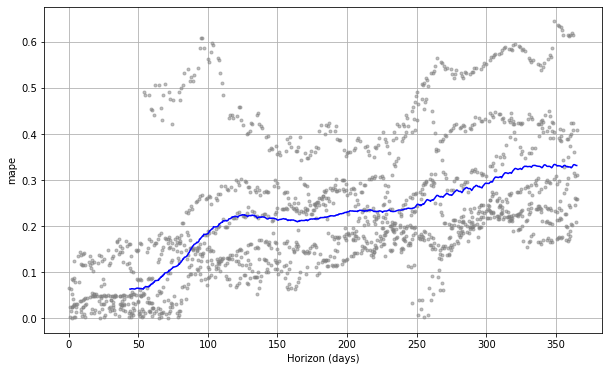

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig4 = plot_cross_validation_metric(cv_results, metric='mape')

In [ ]:
dss=new_df[['Close','ma_rolling_3_C','wma_rolling_3_C','ewm_window_3_C']]

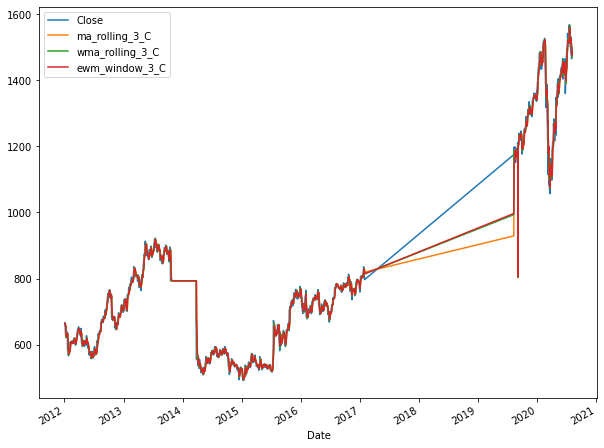

In [ ]:
dss.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7eff3990df50>,
      dtype=object)

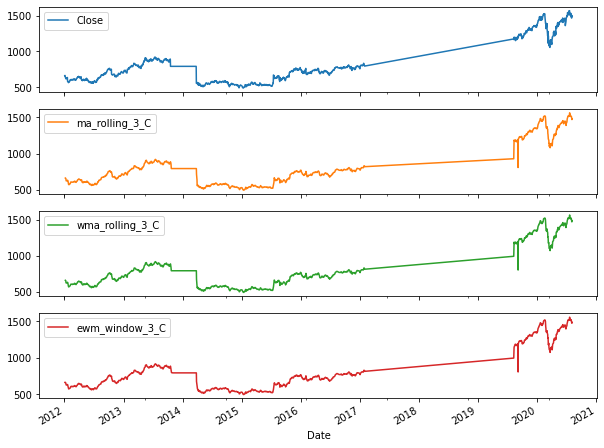

In [ ]:
dss.plot(subplots=True)